In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
import statistics
from scipy.stats import uniform
import seaborn as sns
import math
%matplotlib inline

from src.model05 import Schelling
import src.plots as plots

Now we instantiate a model instance: a 20x20 grid, with an 80% chance of an agent being placed in each cell, and the income distribution is skewed to the right (There are 4 types of income distribution available: 'right' , 'left' , 'normal' , 'uniform'. For more information and visualisation of the distributions, scroll to the end of this document)

In [2]:
#Running the model for a certain amount of steps
model = Schelling(
    height = 20,  
    width = 20, 
    density = 0.8, 
    income_distribution_type = "right",
    neighborhood_radius = 1)
total_steps = 50
model.run_model(step_count = total_steps)

left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side median
left side medi

In [3]:
df = model.datacollector.get_model_vars_dataframe()
df.head()

,agent_counts,agent_incomes
0,"{(0, 0): 1, (0, 1): 1, (0, 2): 1, (0, 3): 1, (...","{(0, 0): [75.49787122514584], (0, 1): [68.0369..."
1,"{(0, 0): 1, (0, 1): 1, (0, 2): 0, (0, 3): 1, (...","{(0, 0): [75.49787122514584], (0, 1): [68.0369..."
2,"{(0, 0): 1, (0, 1): 1, (0, 2): 0, (0, 3): 0, (...","{(0, 0): [75.49787122514584], (0, 1): [68.0369..."
3,"{(0, 0): 0, (0, 1): 1, (0, 2): 0, (0, 3): 0, (...","{(0, 0): [], (0, 1): [68.03698967707096], (0, ..."
4,"{(0, 0): 0, (0, 1): 1, (0, 2): 1, (0, 3): 1, (...","{(0, 0): [], (0, 1): [68.03698967707096], (0, ..."


**Plots from datacollector, with normalized lims...**

In [4]:
# find absolute max values for density and income

# max_income (if income stays the same across the entire model)
max_income = max([item for sublist in df.loc[0,"agent_incomes"].values() for item in sublist])
max_income = np.round(math.ceil(max_income/10))*10 # rounding up to nearest upper multiple of 10

# max agent density per cell
max_count = df.apply(lambda x: max(x.agent_counts.values()), axis = 1).max()
max_count = np.round(math.ceil(max_count/10))*10 # rounding up to nearest upper multiple of

In [5]:
# make folder and plots at each step

os.makedirs("../results/model05/", exist_ok = True)

for mystep in range(total_steps):

    zfill_step = "{:03d}".format(mystep)
    print(zfill_step)

    fig, ax = plt.subplots(1,3, figsize = (30,10))

    vals_counts_incomes = {}

    # plot agent numbers
    i = 0
    vals_counts = np.zeros((model.width, model.height))
    for k, v in df.loc[mystep, "agent_counts"].items():
        vals_counts_incomes[k] = {}
        vals_counts_incomes[k]["count"] = v
        vals_counts[k]=v
    im = ax[i].imshow(
        vals_counts,
        vmin = 0,
        vmax = max_count,
        cmap = "Reds",
        )
    ax[i].set_title("Agent counts")
    ax[i].set_axis_off()
    plt.colorbar(im, shrink = 0.7)

    # plot agent mean incomes
    i = 1
    vals_incomes = np.zeros((model.width, model.height))
    for k, v in df.loc[mystep, "agent_incomes"].items():
        vals_counts_incomes[k]["income"] = v
        if v:
            vals_incomes[k]=statistics.median(v)
    ax[i].set_title("Income medians")
    im = ax[i].imshow(
        vals_incomes,
        vmin = 0, 
        vmax = max_income,
        cmap = "Greens"
        )
    ax[i].set_axis_off()
    plt.colorbar(im, shrink = 0.7)

    # plot agent counts vs. median incomes
    i = 2
    ax[i].scatter(
        x = [v["count"] for v in vals_counts_incomes.values()],
        y = [statistics.median(v["income"]) if v["income"] else 0 for v in vals_counts_incomes.values()],
        s = 5,
        color = "black"
    )
    ax[i].set_title("Agent count vs. median income")
    ax[i].set_xlim([0,max_count])
    ax[i].set_xlabel("Agent counts")
    ax[i].set_ylim([0,max_income])
    ax[i].set_ylabel("Agent incomes")
    plt.title(zfill_step)
    fig.savefig(f"../results/model05/{zfill_step}.png")

    plt.close()

000
001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
019
020
021
022
023
024
025
026
027
028
029
030
031
032
033
034
035
036
037
038
039
040
041
042
043
044
045
046
047
048
049


In [17]:
# # make video
# fps = 1
# img_folder_name = "../results/model04/"
# images = sorted([img for img in os.listdir(img_folder_name) if img.endswith(".png")])
# video_name = "../results/model04/video.mp4"
# frame = cv2.imread(os.path.join(img_folder_name, images[0]))
# height, width, layers = frame.shape
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# video = cv2.VideoWriter(video_name, fourcc, fps, (width,height))
# for image in images:
#     video.write(cv2.imread(os.path.join(img_folder_name, image)))
# cv2.destroyAllWindows()
# video.release()

***
***

@Anne: didn't touch anything below these lines! :) (apart from commenting out the video code)

***
***

### STD and max, min of cells and neighborhoods ###

Text(0.5, 1.0, 'Step 50: Distribution std income per average income of a cell')

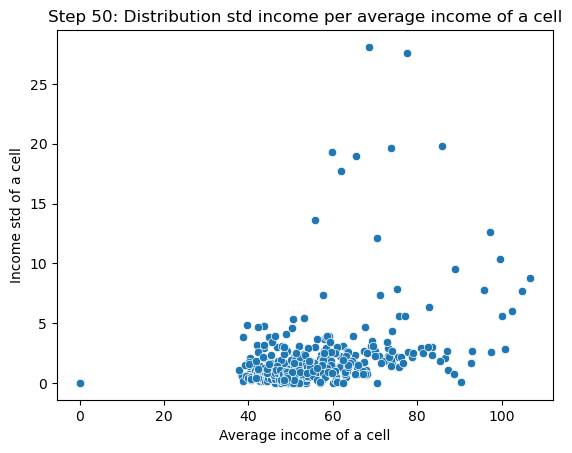

In [3]:
model_income = []
model_income_std = []

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    list_income = []
    cell_content = cell[0]
    x = cell[1][0]
    y = cell[1][1]
    density = len(cell_content)
    if len(cell_content) != 0:  # If there are agents on the cell
        for agent in cell_content:
            list_income.append(agent.income)
        mean_income = mean(list_income)
        std_income = np.std(list_income)
    else:
        mean_income = 0
        std_income = 0
    model_income.append(mean_income)
    model_income_std.append(std_income)
    agent_counts[x][y] = std_income

sns.scatterplot(x=model_income, y=model_income_std)
plt.xlabel('Average income of a cell')
plt.ylabel('Income std of a cell')
plt.title(f'Step {model.schedule.steps}: Distribution std income per average income of a cell')

Text(0.5, 1.0, 'Step 50: Distribution std income per average income of a neighborhood')

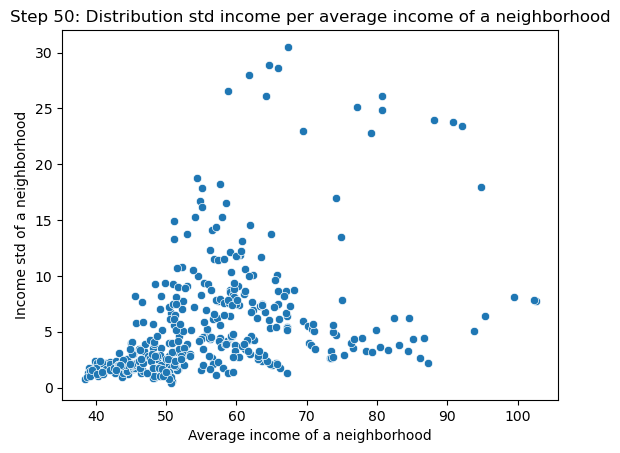

In [4]:
model_income_mean = []
model_income_std = []
for cell in model.grid.coord_iter():
    income_list =[]
    list_agents = cell[0]
    x = cell[1][0]
    y = cell[1][1]

    if model.grid.is_cell_empty((x, y)):
        parcel_value_mean = 0
        parcel_value_std = 0
    else:
        for agent in list_agents:
            income_list += [agent.income]

        for neighbor in model.grid.iter_neighbors(pos=(x,y),moore=True):
            income_list.append(neighbor.income)

        parcel_value_mean = mean(income_list)
        parcel_value_std = np.std(income_list)
        model_income_mean.append(parcel_value_mean)
        model_income_std.append(parcel_value_std)

sns.scatterplot(x=model_income_mean, y=model_income_std)
plt.xlabel('Average income of a neighborhood')
plt.ylabel('Income std of a neighborhood')
plt.title(f'Step {model.schedule.steps}: Distribution std income per average income of a neighborhood')

Text(0.5, 1.0, 'Step 20: Distribution max,min income per average income of a neighborhood')

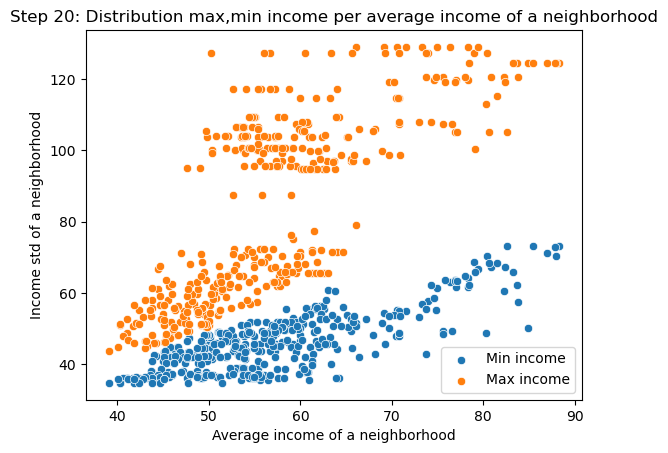

In [6]:
model_income_mean = []
model_income_min = []
model_income_max = []
for cell in model.grid.coord_iter():
    income_list = []
    list_agents = cell[0]
    x = cell[1][0]
    y = cell[1][1]

    if model.grid.is_cell_empty((x, y)):
        parcel_value_mean = 0
        parcel_value_std = 0
    else:
        for agent in list_agents:
            income_list += [agent.income]

        for neighbor in model.grid.iter_neighbors(pos=(x, y), moore=True):
            income_list.append(neighbor.income)

        parcel_value_mean = mean(income_list)
        parcel_value_std = np.min(income_list)
        parcel_value_max = np.max(income_list)
        model_income_mean.append(parcel_value_mean)
        model_income_min.append(parcel_value_std)
        model_income_max.append(parcel_value_max)

sns.scatterplot(x=model_income_mean, y=model_income_min, label='Min income')
sns.scatterplot(x=model_income_mean, y=model_income_max, label='Max income')
plt.xlabel('Average income of a neighborhood')
plt.ylabel('Income std of a neighborhood')
plt.title(f'Step {model.schedule.steps}: Distribution max,min income per average income of a neighborhood')

## Transform plots into a video ##

In [2]:
# import imageio
# import os

# image_folder = '../Model4/modelrun_images'  # Replace this with your image folder path
# video_name = 'output_video.mp4'  # Output video file name
# output_folder = '../Model4'

# images = []
# file_names = sorted([os.path.join(image_folder, fn) for fn in os.listdir(image_folder) if fn.endswith('.png')])

# for file_name in file_names:
#     images.append(imageio.imread(file_name))

# # Save the images as a video
# video_path = os.path.join(output_folder, video_name)
# imageio.mimsave(video_path, images, fps=1)

# print(f"Video created: {video_path}")

C:\Users\anned\AppData\Local\Temp\ipykernel_12624\3526723661.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_name))
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1300, 400) to (1312, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video created: ../Model4\output_video.mp4


### Used income distributions for the model ###

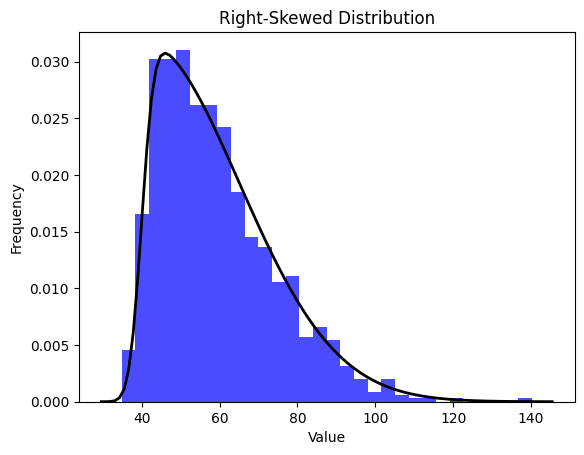

<Figure size 640x480 with 0 Axes>

In [4]:
# Set the seed for reproducibility
np.random.seed(42)

# Parameters for the skewed distribution
a = 10  # shape parameter (controls skewness)
loc = 40  # mean of the distribution
scale = 25  # standard deviation

# Generate random samples from a skewed distribution
data = skewnorm.rvs(a, loc=loc, scale=scale, size=1000)

# Plot the histogram
plt.hist(data, bins=30, density=True, alpha=0.7, color='blue')

# Plot the probability density function (PDF) of the skewed distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = skewnorm.pdf(x, a, loc=loc, scale=scale)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Right-Skewed Distribution')
plt.show()

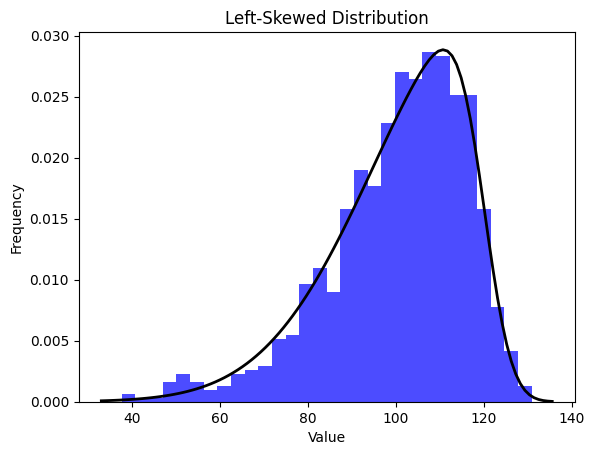

In [13]:
# Parameters for the left-skewed distribution
a_left_skewed = -5  # shape parameter (controls skewness)
mean = 120  # desired mean of the distribution
scale = 25  # standard deviation

# Calculate the location parameter based on the desired mean
loc_left_skewed = mean - scale * a_left_skewed / 2  # For a left-skewed distribution

# Generate random samples from the left-skewed distribution
data_left_skewed = skewnorm.rvs(a_left_skewed, loc=mean, scale=scale, size=1000)

# Plot the histogram of the left-skewed distribution
plt.hist(data_left_skewed, bins=30, density=True, alpha=0.7, color='blue', label='Histogram')

# Plot the probability density function (PDF) of the left-skewed distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = skewnorm.pdf(x, a_left_skewed, loc=mean, scale=scale)
plt.plot(x, p, 'k', linewidth=2, label='PDF')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Left-Skewed Distribution')

plt.savefig('../Model4/test.png')

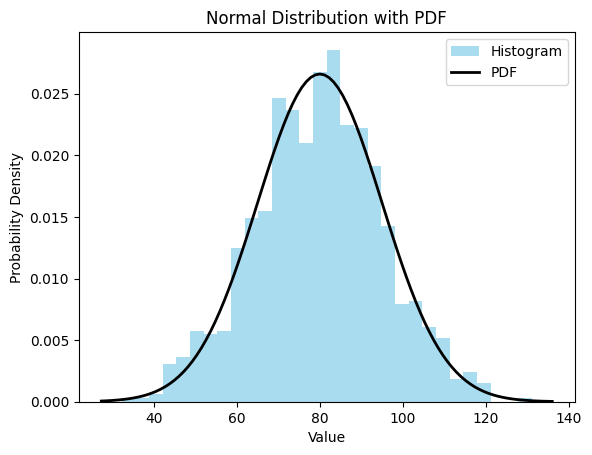

In [8]:
# Generate random data following a normal distribution
mean = 80  # Mean of the distribution
std_dev = 15  # Standard deviation of the distribution
num_samples = 1000  # Number of samples

# Generate random samples from a normal distribution
data = np.random.normal(mean, std_dev, num_samples)

# Create a histogram to visualize the distribution
plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue', label='Histogram')

# Plot the probability density function (PDF) of the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std_dev**2))
plt.plot(x, p, 'k', linewidth=2, label='PDF')

# Add labels, title, and legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Normal Distribution with PDF')
plt.legend()

# Show the plot
plt.show()

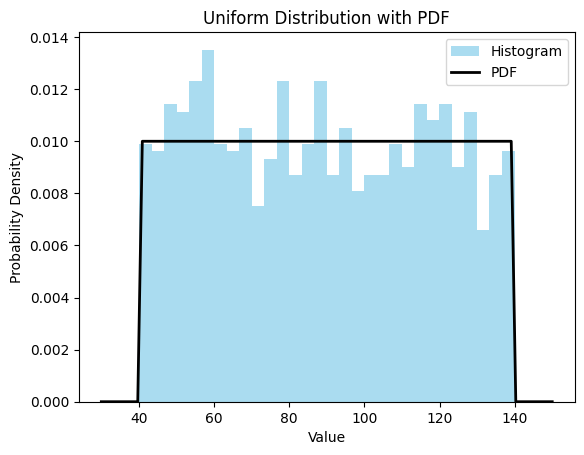

In [12]:
# Parameters for the uniform distribution
lower_bound = 30  # Lower bound of the distribution
upper_bound = 130  # Upper bound of the distribution

# Generate random samples from a uniform distribution
num_samples = 1000  # Number of samples
data = uniform.rvs(loc=lower_bound, scale=upper_bound - lower_bound, size=num_samples)

# Create a histogram to visualize the distribution
plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue', label='Histogram')

# Plot the probability density function (PDF) of the uniform distribution
x = np.linspace(lower_bound - 10, upper_bound + 10, 100)
pdf = uniform.pdf(x, loc=lower_bound, scale=upper_bound - lower_bound)
plt.plot(x, pdf, 'k', linewidth=2, label='PDF')

# Add labels, title, and legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Uniform Distribution with PDF')
plt.legend()

# Show the plot
plt.show()